In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data =pd.read_csv("iris.csv")
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
data.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [4]:
data.duplicated().sum()

1

In [5]:
data=data.drop_duplicates()

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [8]:
variety=LabelEncoder()
data["variety"]=variety.fit_transform(data["variety"])

C:\Users\HP\AppData\Local\Temp/ipykernel_21936/926376405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["variety"]=variety.fit_transform(data["variety"])


In [9]:
x =data.drop('variety',axis=1)
y =data['variety']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [11]:
x_train.shape

(119, 4)

In [12]:
model=Sequential()
model.add(Dense(10,input_dim=4,kernel_initializer="uniform",activation="relu"))
model.add(Dense(12,kernel_initializer="uniform",activation="relu"))
model.add(Dense(15,kernel_initializer="uniform",activation="relu"))
model.add(Dense(25,activation="relu"))
model.add(Dense(3,kernel_initializer="uniform",activation="softmax"))

callbacks=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=10)
model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(learning_rate=0.001),
             metrics=["accuracy"])
model.summary()

C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │             195 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 25)                  │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              78 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 855 (3.34 KB)

 Trainable params: 855 (3.34 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
training_info=model.fit(x_train,y_train,batch_size=20,epochs=200,validation_data=(x_test,y_test),callbacks=callbacks)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4046 - loss: 1.0986 - val_accuracy: 0.3000 - val_loss: 1.0990
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3351 - loss: 1.0986 - val_accuracy: 0.3000 - val_loss: 1.0990
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3515 - loss: 1.0987 - val_accuracy: 0.3000 - val_loss: 1.0989
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3400 - loss: 1.0984 - val_accuracy: 0.3000 - val_loss: 1.0990
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3446 - loss: 1.0979 - val_accuracy: 0.3333 - val_loss: 1.0989
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3391 - loss: 1.0982 - val_accuracy: 0.3667 - val_loss: 1.0984
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4763 - loss: 1.0974 - val_accuracy: 0.3000 - val_loss: 1.0974
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3551 - loss: 1.0959 - val_accuracy: 0.3000 - val_loss: 1.0956

In [14]:
hist=training_info.history

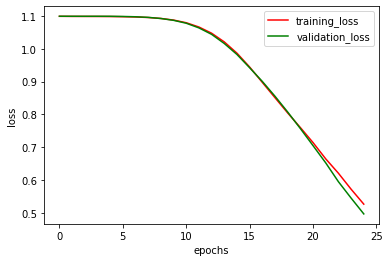

In [15]:
plt.plot(hist["loss"],label="training_loss",color="red")
plt.plot(hist["val_loss"],label="validation_loss",color="green")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

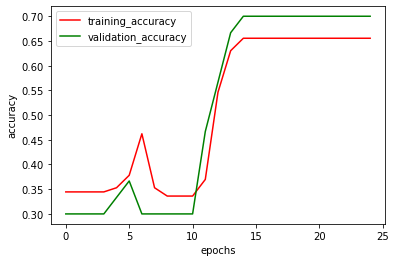

In [16]:
plt.plot(hist["accuracy"],label="training_accuracy",color="red")
plt.plot(hist["val_accuracy"],label="validation_accuracy",color="green")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

In [17]:
y_pred=model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


In [18]:
y_pred

array([[0.79105574, 0.11784665, 0.09109757],
       [0.00426452, 0.33641112, 0.65932435],
       [0.76827395, 0.13012187, 0.10160419],
       [0.04439262, 0.4409778 , 0.5146296 ],
       [0.00154689, 0.291595  , 0.7068581 ],
       [0.0042558 , 0.3402474 , 0.65549684],
       [0.00299055, 0.32224634, 0.67476314],
       [0.7897997 , 0.11856311, 0.09163715],
       [0.00113976, 0.28052887, 0.7183314 ],
       [0.7456174 , 0.14345805, 0.1109246 ],
       [0.02199449, 0.4180371 , 0.5599684 ],
       [0.8058258 , 0.10987173, 0.08430248],
       [0.7830751 , 0.12247637, 0.09444851],
       [0.7934153 , 0.11666033, 0.0899244 ],
       [0.02975457, 0.43589354, 0.53435194],
       [0.00295308, 0.3263441 , 0.6707028 ],
       [0.00207511, 0.30220354, 0.6957214 ],
       [0.03441086, 0.436085  , 0.52950424],
       [0.7797292 , 0.123985  , 0.0962859 ],
       [0.009221  , 0.3762868 , 0.6144921 ],
       [0.77577084, 0.12617841, 0.09805082],
       [0.05325872, 0.44463798, 0.50210327],
       [0.

In [19]:
y_pred=np.argmax(y_pred,axis=1)

In [20]:
pd.DataFrame({'True values':y_test,'Prediction values':y_pred})

,True values,Prediction values
40,0,0
146,2,2
38,0,0
99,1,2
143,2,2
116,2,2
148,2,2
39,0,0
135,2,2
23,0,0
